## Pre-task

In [1]:
import warnings
warnings.filterwarnings("ignore")

Some quick EDA

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
# Load data
train_base_df = pd.read_csv('folder_material/ecommerce_returns_train.csv')
test_base_df = pd.read_csv('folder_material/ecommerce_returns_test.csv')

In [5]:
train_base_df.describe().T.applymap('{:.2f}'.format)

,count,mean,std,min,25%,50%,75%,max
order_id,8000.00,4982.99,2901.63,1.00,2449.75,4995.50,7494.25,10000.00
customer_age,8000.00,35.02,11.14,18.00,27.00,35.00,43.00,75.00
customer_tenure_days,8000.00,375.18,374.20,0.00,108.00,261.50,518.25,3465.00
product_price,8000.00,45.80,43.64,10.00,18.63,32.95,57.31,500.00
days_since_last_purchase,8000.00,43.92,43.83,0.00,13.00,31.00,61.00,365.00
previous_returns,8000.00,0.51,0.70,0.00,0.00,0.00,1.00,5.00
product_rating,8000.00,3.99,0.58,1.90,3.60,4.00,4.40,5.00
discount_applied,8000.00,0.31,0.46,0.00,0.00,0.00,1.00,1.00
is_return,8000.00,0.25,0.43,0.00,0.00,0.00,1.00,1.00


In [6]:
test_base_df.describe().T.applymap('{:.2f}'.format)

,count,mean,std,min,25%,50%,75%,max
order_id,2000.00,5070.55,2826.81,6.00,2689.50,5025.50,7533.25,9986.00
customer_age,2000.00,34.66,11.22,18.00,26.00,34.00,42.00,75.00
customer_tenure_days,2000.00,370.55,374.38,0.00,110.00,257.50,503.00,2911.00
product_price,2000.00,44.70,39.80,10.00,18.91,32.25,56.48,405.80
days_since_last_purchase,2000.00,44.93,44.16,0.00,12.00,30.00,64.00,365.00
previous_returns,2000.00,0.50,0.70,0.00,0.00,0.00,1.00,5.00
product_rating,2000.00,4.00,0.58,1.60,3.60,4.00,4.40,5.00
discount_applied,2000.00,0.27,0.44,0.00,0.00,0.00,1.00,1.00
is_return,2000.00,0.25,0.43,0.00,0.00,0.00,1.00,1.00


In [7]:
train_base_df.select_dtypes(include='object').describe().T

,count,unique,top,freq
product_category,8000,3,Fashion,4444
size_purchased,4444,6,M,1340


In [10]:
test_base_df.select_dtypes(include='object').describe().T

,count,unique,top,freq
product_category,2000,3,Fashion,1104
size_purchased,1104,6,L,351


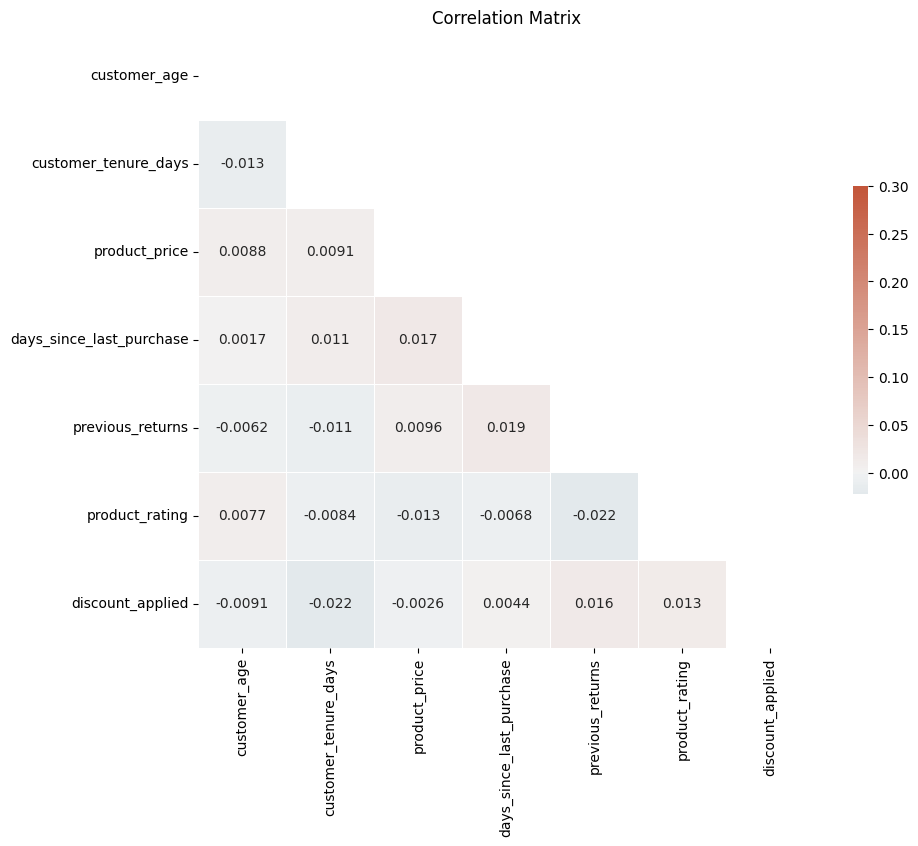

In [9]:
# Compute the correlation matrix
corr = train_base_df.iloc[:,1:-1].select_dtypes(exclude='object').corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 8))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title("Correlation Matrix")

plt.show()

In [11]:
for i in test_base_df.select_dtypes(include='object').columns:
    vals = round(test_base_df[i].value_counts(normalize=True)[:15].sum(),4)
    print(f'Column: {i}, total in the first 10 values: {vals}','\n', '')
    print(test_base_df[i].value_counts(dropna=False, normalize=True)[:15])
    print('************','\n')

Column: product_category, total in the first 10 values: 1.0 
 
product_category
Fashion        0.5520
Electronics    0.3035
Home_Decor     0.1445
Name: proportion, dtype: float64
************ 

Column: size_purchased, total in the first 10 values: 1.0 
 
size_purchased
NaN    0.4480
L      0.1755
M      0.1585
S      0.1100
XL     0.0505
XS     0.0290
XXL    0.0285
Name: proportion, dtype: float64
************ 



In [12]:
for i in test_base_df.select_dtypes(include='object').columns:
    vals = round(test_base_df[i].value_counts(normalize=True)[:15].sum(),4)
    print(f'Column: {i}, total in the first 10 values: {vals}','\n', '')
    print(test_base_df[i].value_counts(dropna=False, normalize=True)[:15])
    print('************','\n')

Column: product_category, total in the first 10 values: 1.0 
 
product_category
Fashion        0.5520
Electronics    0.3035
Home_Decor     0.1445
Name: proportion, dtype: float64
************ 

Column: size_purchased, total in the first 10 values: 1.0 
 
size_purchased
NaN    0.4480
L      0.1755
M      0.1585
S      0.1100
XL     0.0505
XS     0.0290
XXL    0.0285
Name: proportion, dtype: float64
************ 



See some rows of data

In [13]:
train_base_df.sample(15)

,order_id,customer_age,customer_tenure_days,product_category,product_price,days_since_last_purchase,previous_returns,product_rating,discount_applied,size_purchased,is_return
4360,4380,25,896,Fashion,43.81,28,0,4.6,1,L,0
1947,3653,40,785,Fashion,10.81,63,0,4.5,0,XL,1
1122,6378,35,53,Fashion,17.13,5,0,5.0,0,S,1
149,8717,42,292,Fashion,31.78,81,0,4.1,1,M,0
3672,5162,18,386,Fashion,58.90,100,0,3.5,0,L,1
2817,600,39,489,Fashion,19.40,19,1,3.1,0,XS,1
1520,3575,19,131,Fashion,58.14,5,1,4.2,0,L,0
1414,5309,25,283,Home_Decor,24.00,56,2,3.3,0,NaN,0
2945,9187,18,495,Home_Decor,39.77,18,1,4.4,0,NaN,0
6719,555,39,559,Fashion,37.39,68,0,4.3,0,M,1


train_base_df.sample(30)

In [14]:
print(f"Train shape: {train_base_df.shape}")
print(f"Test shape: {test_base_df.shape}")
print(f"Train percentage of returned items: {round(train_base_df['is_return'].mean()*100,2)}%")
print(f"Test percentage of returned items: {round(test_base_df['is_return'].mean()*100,2)}%")

Train shape: (8000, 11)
Test shape: (2000, 11)
Train percentage of returned items: 25.26%
Test percentage of returned items: 25.25%


## Part 1 - Baseline

In [15]:
"""
Baseline Model - Simple Logistic Regression
Use this as your starting point
"""

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load data
train = pd.read_csv('folder_material/ecommerce_returns_train.csv')
test = pd.read_csv('folder_material/ecommerce_returns_test.csv')

def preprocess(df):
    """Simple preprocessing pipeline"""
    df_processed = df.copy()
    
    # Encode categorical: product_category
    le_category = LabelEncoder()
    df_processed['product_category_encoded'] = le_category.fit_transform(
        df_processed['product_category']
    )
    
    # Handle missing sizes (Fashion items only have sizes)
    if df_processed['size_purchased'].notna().any():
        most_common_size = df_processed['size_purchased'].mode()[0]
        df_processed['size_purchased'].fillna(most_common_size, inplace=True)
        
        le_size = LabelEncoder()
        df_processed['size_encoded'] = le_size.fit_transform(
            df_processed['size_purchased']
        )
    
    # Feature selection
    feature_cols = [
        'customer_age', 'customer_tenure_days', 'product_category_encoded',
        'product_price', 'days_since_last_purchase', 'previous_returns',
        'product_rating', 'size_encoded', 'discount_applied'
    ]
    
    X = df_processed[feature_cols]
    y = df_processed['is_return']
    
    return X, y

# Prepare data
X_train, y_train = preprocess(train)
X_test, y_test = preprocess(test)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train baseline model
baseline_model = LogisticRegression(random_state=42, max_iter=1000)
baseline_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = baseline_model.predict(X_test_scaled)

# Basic evaluation
print("Baseline Model Performance")
print("=" * 50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save artifacts
joblib.dump(baseline_model, 'baseline_files/baseline_model.pkl')
joblib.dump(scaler, 'baseline_files/scaler.pkl')

print("\n" + "=" * 50)
print("YOUR TASK: Evaluate thoroughly and improve this baseline")
print("=" * 50)

Baseline Model Performance
Accuracy: 0.7475

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1495
           1       0.00      0.00      0.00       505

    accuracy                           0.75      2000
   macro avg       0.37      0.50      0.43      2000
weighted avg       0.56      0.75      0.64      2000


YOUR TASK: Evaluate thoroughly and improve this baseline


Some insights just for a simple view

- The performance of the model it is very poor, not precision at all and zero recall for the main class (return product)
- The use of LabelEconder for categorical features with not ordinal order, it is a terrible error becouse we are given an inexistent order, for example asssuming that "Home_Decor" is two times "Electronics". If we use a model like Logistic Regresion the value we assing must has some meaning

### Reproduce original results with modular approach

The main idea is to generate some simple python class including the same transformation used in the Baseline, just for checking the metrics on different sub-sets of data

In [16]:
class BaselineTransformer:
    """Reproduce exactamente el preprocesamiento del baseline"""
    
    def __init__(self):
        self.le_category = LabelEncoder()
        self.le_size = LabelEncoder()
        self.scaler = StandardScaler()
        self.most_common_size = None
        
    def fit(self, df):
        """Ajusta los encoders y scaler con train"""
        # Fit category encoder
        self.le_category.fit(df['product_category'])
        
        # Fit size encoder (guardando el mode para fillna)
        if df['size_purchased'].notna().any():
            self.most_common_size = df['size_purchased'].mode()[0]
            size_filled = df['size_purchased'].fillna(self.most_common_size)
            self.le_size.fit(size_filled)
        
        # Crear features para fit del scaler
        X = self._create_features(df)
        self.scaler.fit(X)
        
        return self
    
    def _create_features(self, df):
        """Crea las features exactamente como en el baseline"""
        df_processed = df.copy()
        
        # Encode product_category
        df_processed['product_category_encoded'] = self.le_category.transform(
            df_processed['product_category']
        )
        
        # Handle and encode size
        df_processed['size_purchased'].fillna(self.most_common_size, inplace=True)
        df_processed['size_encoded'] = self.le_size.transform(
            df_processed['size_purchased']
        )
        
        # Select features en el mismo orden
        feature_cols = [
            'customer_age', 'customer_tenure_days', 'product_category_encoded',
            'product_price', 'days_since_last_purchase', 'previous_returns',
            'product_rating', 'size_encoded', 'discount_applied'
        ]
        
        return df_processed[feature_cols]
    
    def transform(self, df):
        """Transforma el dataset"""
        X = self._create_features(df)
        X_scaled = self.scaler.transform(X)
        y = df['is_return'].values
        
        return X_scaled, y
    
    def fit_transform(self, df):
        """Fit y transform en un paso"""
        self.fit(df)
        return self.transform(df)

Test the class for exact same results

In [17]:
transformer = BaselineTransformer()
X_train_gral, y_train_gral = transformer.fit_transform(train)
X_test_gral, y_test_gral = transformer.transform(test)

baseline_model_modular = LogisticRegression(random_state=42, max_iter=1000)
baseline_model_modular.fit(X_train_gral, y_train_gral)

y_pred_gral = baseline_model_modular.predict(X_test_gral)

print("Baseline Model Performance")
print("=" * 50)
print(f"Accuracy: {accuracy_score(y_test_gral, y_pred_gral):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_gral, y_pred_gral))

Baseline Model Performance
Accuracy: 0.7475

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1495
           1       0.00      0.00      0.00       505

    accuracy                           0.75      2000
   macro avg       0.37      0.50      0.43      2000
weighted avg       0.56      0.75      0.64      2000



Now, we can check the model performance on different sub-sets

### Perfomance by product category

#### Fashion

In [18]:
fashion_data = test[test['product_category'] == 'Fashion']

X_test, y_test = transformer.transform(fashion_data)
fasion_predictions = baseline_model_modular.predict(X_test)

print("Baseline Model Performance")
print("=" * 50)
print(f"Accuracy: {accuracy_score(y_test, fasion_predictions):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, fasion_predictions))

Baseline Model Performance
Accuracy: 0.6866

Classification Report:
              precision    recall  f1-score   support

           0       0.69      1.00      0.81       758
           1       0.00      0.00      0.00       346

    accuracy                           0.69      1104
   macro avg       0.34      0.50      0.41      1104
weighted avg       0.47      0.69      0.56      1104



#### Electronics

In [19]:
electronics_data = test[test['product_category'] == 'Electronics']

X_test, y_test = transformer.transform(electronics_data)
electronics_predictions = baseline_model_modular.predict(X_test)

print("Baseline Model Performance")
print("=" * 50)
print(f"Accuracy: {accuracy_score(y_test, electronics_predictions):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, electronics_predictions))

Baseline Model Performance
Accuracy: 0.8287

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       503
           1       0.00      0.00      0.00       104

    accuracy                           0.83       607
   macro avg       0.41      0.50      0.45       607
weighted avg       0.69      0.83      0.75       607



#### Home Decor

In [20]:
home_decor_data = test[test['product_category'] == 'Home_Decor']

X_test, y_test = transformer.transform(home_decor_data)
home_decor_predictions = baseline_model_modular.predict(X_test)

print("Baseline Model Performance")
print("=" * 50)
print(f"Accuracy: {accuracy_score(y_test, home_decor_predictions):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, home_decor_predictions))

Baseline Model Performance
Accuracy: 0.8097

Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       234
           1       0.00      0.00      0.00        55

    accuracy                           0.81       289
   macro avg       0.40      0.50      0.45       289
weighted avg       0.66      0.81      0.72       289



After analyzing the performance by product category, it's observed that the model still obtains very poor results. The same thing happens in every one: both the precision and the recall using the default threshold of 0.5 are equal to 0 for the label 1 (in this case, "is_return"). In other words, the model fails to identify anything regarding the main problem: being able to predict when a product has a high chance of being returned.

### Metrics Explanation

Accuracy: total correct predictions over the total number of observations.

In this case, accuracy is not representative, since the population has a return rate of 25%. Therefore, without using a model and simply saying that "no product will be returned," we would be correct 75% of the time without having done anything at all.

Precision: the percentage of times the model says a product will be returned, and it actually is. That is, how effective it is in predicting the problem (in this case, we only use it for the class that matters to us, "the product will be returned").

Recall: the percentage of correct "product will be returned" predictions, over the total number of products that are actually returned. That is, it measures the reach of the model, in other words, how many returns we are capturing.

All these metrics depend on the threshold used. That is, the model outputs a score between 0 and 1, and we decide when it is a "prediction of a product to be returned" and when it isn't. In the results mentioned above, the value of 0.5 was used, meaning an infinite number of possible values could be tested and the metrics evaluated.

Therefore, it's necessary to use a metric independent of the threshold to evaluate the model's performance. In this case, that metric is the AUC (Area Under the Curve), which is used to estimate the model's degree of accuracy, independently of the threshold. Its values are between 0 and 1, and the closer it is to 1, the better.

In [21]:
from sklearn.metrics import roc_auc_score

y_probs_gral = baseline_model_modular.predict_proba(X_test_gral)[:, 1]
auc = roc_auc_score(y_test_gral, y_probs_gral)
print(f"AUC: {auc:.4f}")

AUC: 0.5525
